In [1]:
import numpy as np
import pandas as pd
from PyQt6.QtNetwork.QHttpHeaders import values

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
X = iris.data
Y = iris.target
columns= iris.feature_names

In [3]:
X.shape

(150, 4)

In [4]:
columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df = pd.DataFrame(X,columns=columns)

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
df['species'] = Y

In [9]:
!pip install missingno

<Axes: >

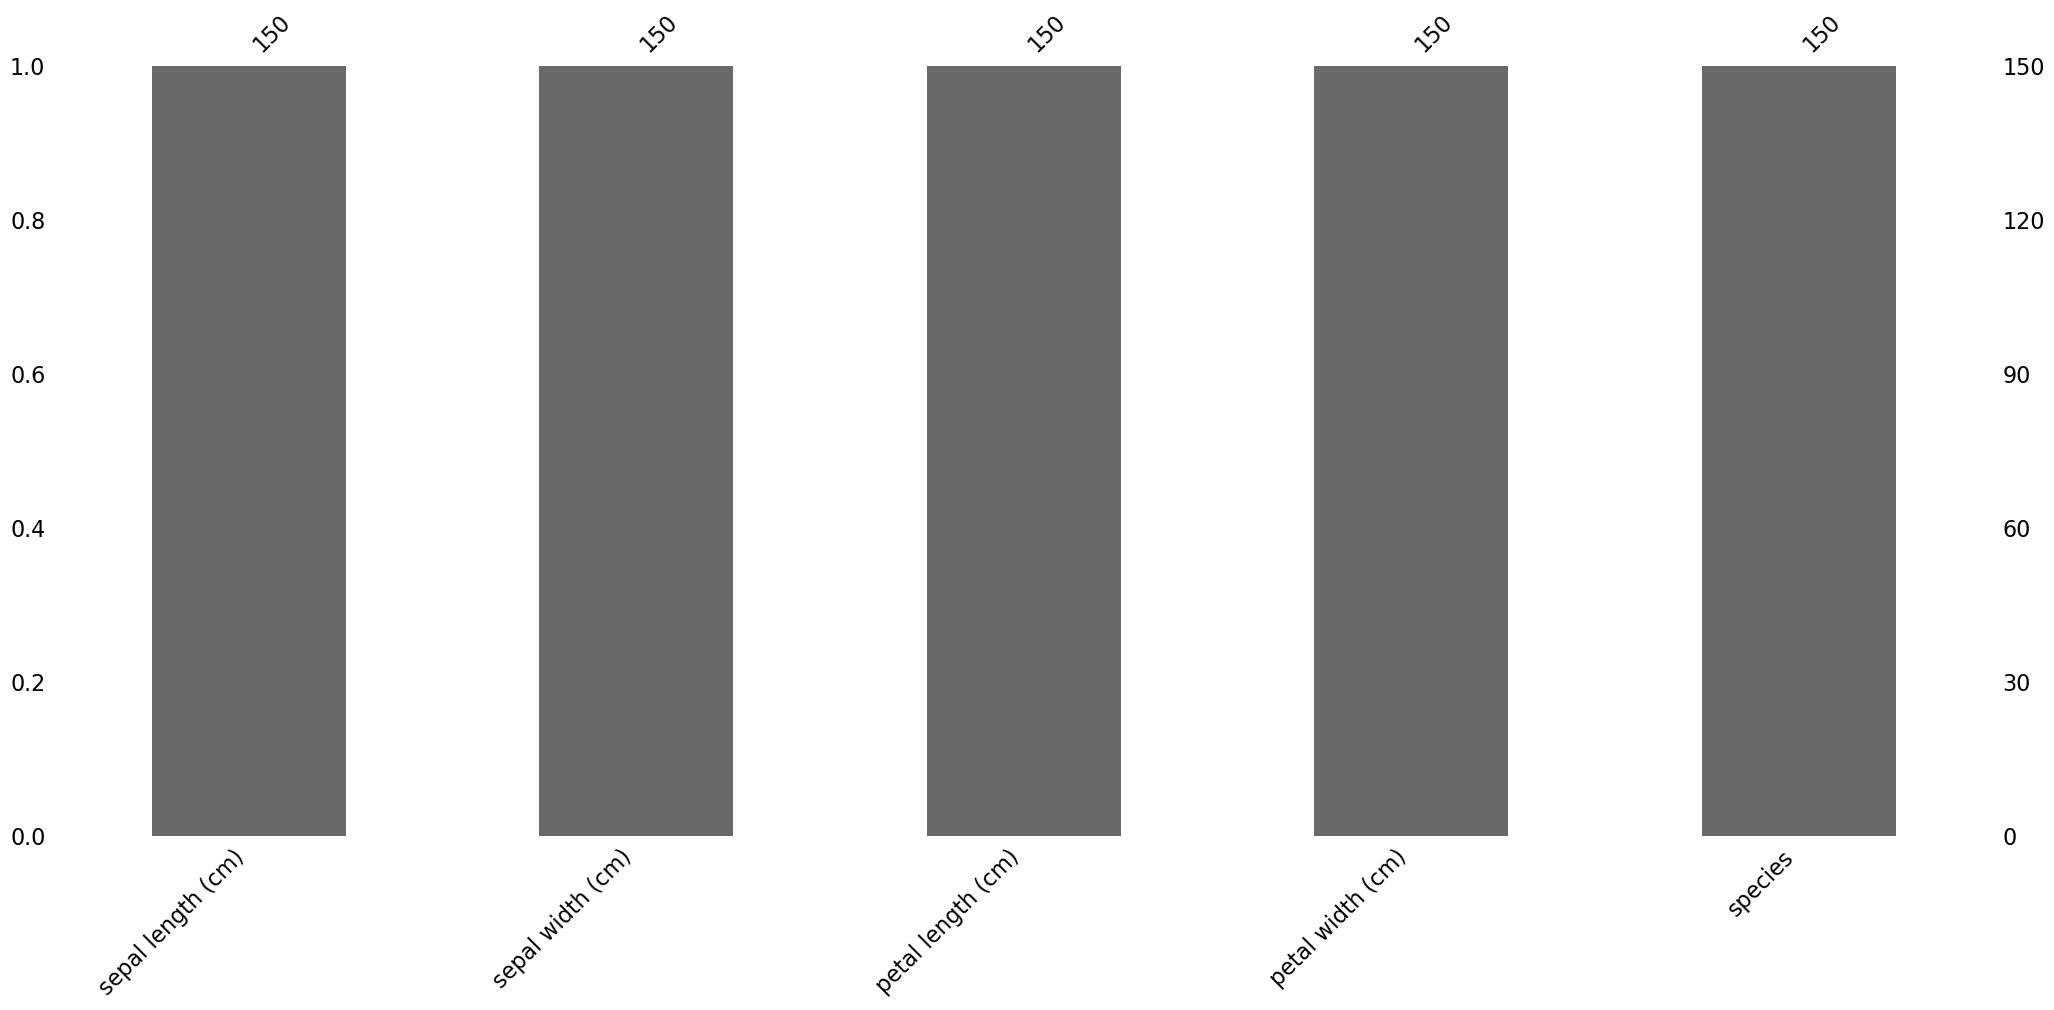

In [11]:
import missingno as msn
msn.bar(df)

<Axes: xlabel='None', ylabel='count'>

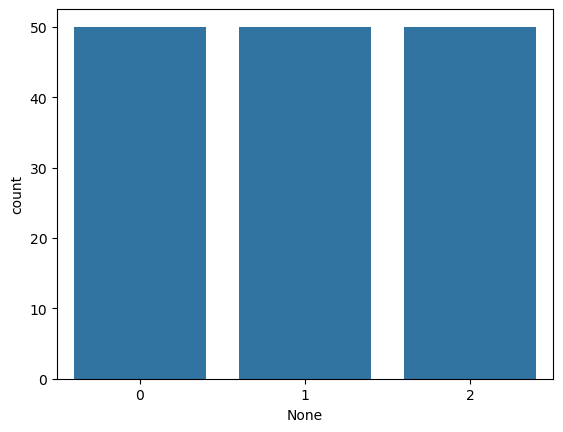

In [15]:
import seaborn as sns
import pandas as pd

sns.countplot(x=pd.Series(Y))


<Axes: >

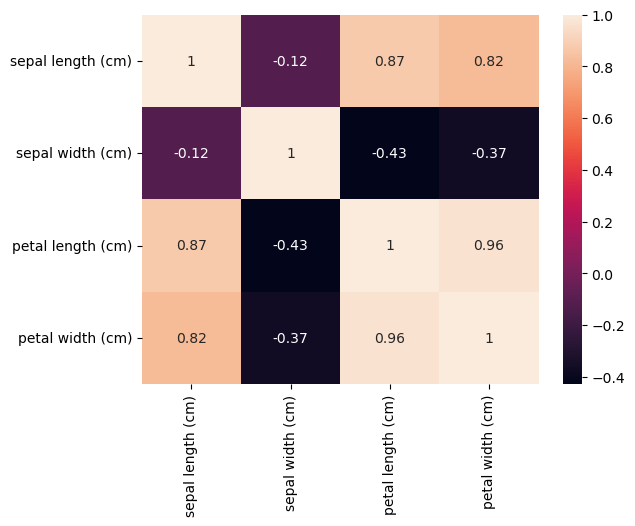

In [16]:
sns.heatmap(df.iloc[:,:-1].corr(),annot=True)

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scaled = ss.fit_transform(X)

In [20]:
cov = x_scaled.T.dot(x_scaled)

In [21]:
cov.shape

(4, 4)

In [27]:
values,vectors = np.linalg.eig(cov)

In [29]:
explained_variance = []
for value in values:
    explained_variance.append((value*100)/sum(values))


In [30]:
explained_variance

[np.float64(72.96244541329989),
 np.float64(22.85076178670178),
 np.float64(3.6689218892828737),
 np.float64(0.517870910715473)]

In [33]:
f1 = x_scaled.dot(vectors.T[0])
f2 = x_scaled.dot(vectors.T[1])

In [35]:
res = pd.DataFrame()
res['f1'] = f1
res['f2'] = f2
res['species'] = Y

In [36]:
res

,f1,f2,species
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0
...,...,...,...
145,1.870503,-0.386966,2
146,1.564580,0.896687,2
147,1.521170,-0.269069,2
148,1.372788,-1.011254,2


In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_Features = pca.fit_transform(x_scaled)

In [38]:
reduced_Features

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
X,y=load_iris(return_X_y=True)


In [46]:
def between_scatter(X,y):
    global_mean = np.mean(X,axis=0)
    n,k = X.shape
    Sb = np.zeros((k,k),dtype=float)
    classes= np.unique(y)
    for cls in classes:
        mask = (Y==cls)
        X_subset = X[mask]
        class_mean = (np.mean(X_subset,axis=0)).reshape(1,k)
        diff = class_mean - global_mean
        na,ka = X_subset.shape
        Sb+=na*(diff.T.dot(diff))
    return Sb

In [47]:
between_scatter(X,y)

array([[ 63.21213333, -19.95266667, 165.2484    ,  71.27933333],
       [-19.95266667,  11.34493333, -57.2396    , -22.93266667],
       [165.2484    , -57.2396    , 437.1028    , 186.774     ],
       [ 71.27933333, -22.93266667, 186.774     ,  80.41333333]])

In [50]:
def within_scatter(X,y):
    n,k = X.shape
    Sw = np.zeros((k,k),dtype=float)
    classes = np.unique(Y)
    for cls in classes:
        mask = (Y==cls)
        X_subset = X[mask]
        local_mean = (np.mean(X_subset,axis=0)).reshape(1,k)
        diff = X_subset - local_mean
        Sw+=diff.T.dot(diff)
    return Sw

In [51]:
within_scatter(X,y)

array([[38.9562, 13.63  , 24.6246,  5.645 ],
       [13.63  , 16.962 ,  8.1208,  4.8084],
       [24.6246,  8.1208, 27.2226,  6.2718],
       [ 5.645 ,  4.8084,  6.2718,  6.1566]])

In [53]:
Sb = between_scatter(X,y)
Sw = within_scatter(X,y)
cov = (np.linalg.inv(Sw)).dot(Sb)

array([[ -3.05836939,   1.08138264,  -8.1119227 ,  -3.45864987],
       [ -5.56163926,   2.17821866, -14.96461194,  -6.30773951],
       [  8.07743878,  -2.94271854,  21.5115909 ,   9.14206468],
       [ 10.49708187,  -3.41985449,  27.54852482,  11.84588007]])

In [57]:
values,vectors = np.linalg.eig(cov)

In [58]:
values

array([437.77467248, 137.10457072,  22.01353134,   3.10722546])

In [59]:
vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [60]:
f1 = X.dot(vectors.T[0])

In [61]:
f1

array([2.64026976, 2.6707303 , 2.45460631, 2.54551709, 2.56122842,
       2.97594579, 2.4631572 , 2.67313922, 2.43713208, 2.64535121,
       2.80076135, 2.62696735, 2.56213805, 2.12748116, 2.75425956,
       2.88150922, 2.74378055, 2.69675541, 3.10271466, 2.67399249,
       2.9976482 , 2.75741289, 2.12063682, 3.03772014, 2.80109128,
       2.83891951, 2.84415184, 2.75041766, 2.71931109, 2.62873024,
       2.70777158, 2.99453689, 2.53232354, 2.66015291, 2.70183686,
       2.55288478, 2.79065481, 2.45263618, 2.35215603, 2.72524581,
       2.58660751, 2.64929148, 2.29828654, 2.9301884 , 2.96264338,
       2.67510936, 2.67554814, 2.46054103, 2.74865476, 2.64203265,
       6.30429029, 5.93205377, 6.45168671, 5.30232929, 6.14994065,
       5.5620753 , 6.02558071, 4.38700887, 6.06214119, 5.03671489,
       4.66293706, 5.55126638, 5.42034003, 5.9161352 , 4.96066218,
       6.00078133, 5.56907053, 5.23949444, 6.09718803, 5.12955378,
       6.0151017 , 5.48029512, 6.30065563, 5.83009863, 5.78380